In [26]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [27]:
stats_df = pd.read_csv("Resources/raw.csv")
static_df = pd.read_csv("Resources/static_data.csv")

In [28]:
merge_df = pd.merge(static_df, stats_df, on = "Player", how = "inner", suffixes = [" per Season", ""])

In [29]:
salary_per_gs = round(merge_df.groupby('Rnd')['Salary'].sum()/merge_df.groupby('Rnd')['GS'].sum())
salary_per_win = round(merge_df.groupby('Rnd')['Salary'].sum()/merge_df.groupby('Rnd')['Wins'].sum())

starts_per_player = round(merge_df.groupby('Rnd')['GS'].sum()/static_df.groupby('Rnd')['Player'].count())
wins_per_player = round(merge_df.groupby('Rnd')['Wins'].sum()/static_df.groupby('Rnd')['Player'].count())

rounds = [1,2,3,4,5,6,7]
zipped = list(zip(rounds, salary_per_gs, starts_per_player))
zipped2 = list(zip(rounds, salary_per_win, wins_per_player))

graph_df1 = pd.DataFrame(zipped, columns=['Round','Cost per Game Started', 'Games Started']).set_index('Round')
graph_df2 = pd.DataFrame(zipped2, columns=['Round', 'Cost per Win', 'Wins']).set_index('Round')

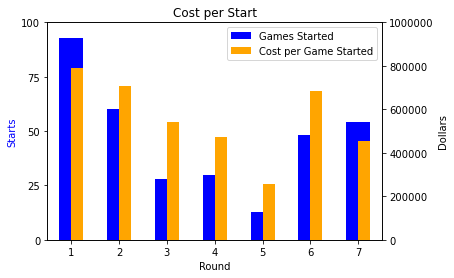

In [30]:
ax1 = graph_df1["Games Started"].plot.bar(color="blue")
ax1.set_title("Cost per Start")
ax1.set_xlabel("Round")
ax1.set_ylabel("Starts", color = "blue")
ax1.set_yticks([0, 25, 50, 75, 100])

plt.xticks(rotation=0, horizontalalignment="center")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.set_ylabel("Dollars")

plt.ticklabel_format(style='plain', axis = "y")
plt.ylim(0,1000000)


graph1 = graph_df1[["Games Started","Cost per Game Started"]].plot.bar(ax=ax2, color=["blue","orange"])

plt.savefig("Output/cost_per_start")

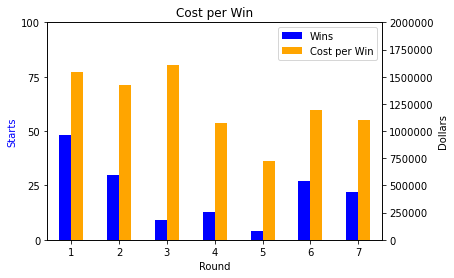

In [31]:
ax1 = graph_df2["Wins"].plot.bar(color="blue")
ax1.set_title("Cost per Win")
ax1.set_xlabel("Round")
ax1.set_ylabel("Starts", color = "blue")
ax1.set_yticks([0, 25, 50, 75, 100])

plt.xticks(rotation=0, horizontalalignment="center")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.set_ylabel("Dollars")

plt.ticklabel_format(style='plain', axis = "y")
plt.ylim(0,2000000)

graph_2 = graph_df2[["Wins","Cost per Win"]].plot.bar(ax=ax2, color=["blue","orange"])

plt.savefig("Output/cost_per_win")

In [48]:
##Removing Tom Brady
outliers = ['Tom Brady', 'Matt Cassel', 'Ryan Fitzpatrick']


no_tom_merge_df=merge_df.loc[((merge_df["Player"] != "Tom Brady") & (merge_df["Player"] != "Matt Cassel") & (merge_df["Player"] != "Ryan Fitzpatrick"))]
no_tom_static_df = static_df.loc[((static_df["Player"] != "Tom Brady") & (static_df["Player"] != "Matt Cassel") & (static_df["Player"] != "Ryan Fitzpatrick"))]

salary_per_gs = round(no_tom_merge_df.groupby('Rnd')['Salary'].sum()/no_tom_merge_df.groupby('Rnd')['GS'].sum())
salary_per_win = round(no_tom_merge_df.groupby('Rnd')['Salary'].sum()/no_tom_merge_df.groupby('Rnd')['Wins'].sum())
starts_per_player = round(no_tom_merge_df.groupby('Rnd')['GS'].sum()/no_tom_static_df.groupby('Rnd')['Player'].count())
wins_per_player = round(no_tom_merge_df.groupby('Rnd')['Wins'].sum()/no_tom_static_df.groupby('Rnd')['Player'].count())
rounds = [1,2,3,4,5,6,7]

zipped = list(zip(rounds, salary_per_gs, starts_per_player))
zipped2 = list(zip(rounds, salary_per_win, wins_per_player))

graph_df3 = pd.DataFrame(zipped, columns=['Round','Cost per Game Started', 'Games Started']).set_index('Round')
graph_df4 = pd.DataFrame(zipped2, columns=['Round', 'Cost per Win', 'Wins']).set_index('Round')

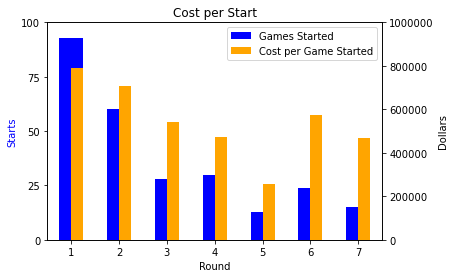

In [49]:

ax1 = graph_df3["Games Started"].plot.bar(color="blue")
ax1.set_title("Cost per Start") 
ax1.set_xlabel("Round") 
ax1.set_ylabel("Starts", color = "blue") 
ax1.set_yticks([0, 25, 50, 75, 100]) 
plt.xticks(rotation=0, horizontalalignment="center")

ax2 = ax1.twinx() 
ax2.spines['right'].set_position(('axes', 1)) 
ax2.set_ylabel("Dollars")

plt.ticklabel_format(style='plain', axis = "y") 
plt.ylim(0,1000000)


graph_3 = graph_df3[["Games Started","Cost per Game Started"]].plot.bar(ax=ax2, color=["blue","orange"])

plt.savefig("Output/cost_per_start_no_tom")

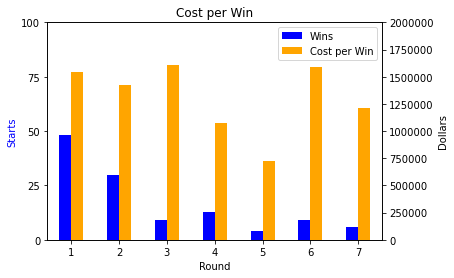

In [50]:
ax1 = graph_df4["Wins"].plot.bar(color="blue")
ax1.set_title("Cost per Win")
ax1.set_xlabel("Round")
ax1.set_ylabel("Starts", color = "blue")
ax1.set_yticks([0, 25, 50, 75, 100])

plt.xticks(rotation=0, horizontalalignment="center")

ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1))
ax2.set_ylabel("Dollars")

plt.ticklabel_format(style='plain', axis = "y")
plt.ylim(0,2000000)


graph_4 = graph_df4[["Wins","Cost per Win"]].plot.bar(ax=ax2, color=["blue","orange"])

plt.savefig("Output/cost_per_win_no_tom")